In [4]:
from sklearn.datasets import load_diabetes
import shap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from IPython.display import display

In [5]:
data = load_diabetes()

In [6]:
data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [8]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
X = data.data
y = data.target

In [10]:
df = pd.DataFrame(data = X,
                         columns = data.feature_names)

In [11]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [12]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


<Axes: >

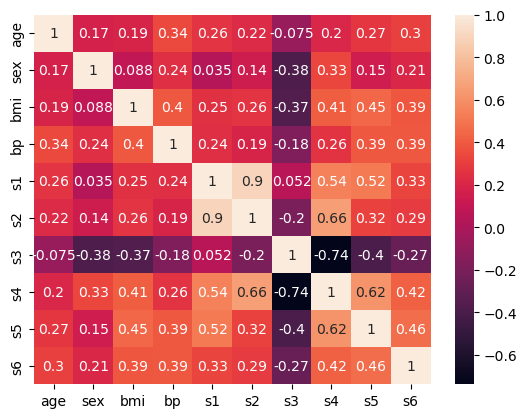

In [13]:
corr = df.corr()
sns.heatmap(corr, square=False, annot=True)

# Model building (XGBRegressor), Calculate SHAP value

In [14]:
model = xgboost.XGBRegressor().fit(df, y)
explainer = shap.Explainer(model, df)
shap_values = explainer(df)

In [15]:
shap_values.shape, shap_values

((442, 10),
 .values =
 array([[  0.45945831,  -5.22000628,   8.30047235, ...,  -0.9678539 ,
          14.75745227,  -5.00800698],
        [ -8.34386816,   9.30136532, -20.43346163, ...,  -0.43988286,
         -37.0757527 ,  -2.60597549],
        [ -0.95174028,  -0.66867075,   1.55677222, ...,   0.68124045,
           9.52177272,  -1.26267636],
        ...,
        [  8.22591959, -10.53657377,  -0.18853496, ...,   1.41083062,
         -37.77360936,  -0.18955991],
        [ -1.33602444,   5.19853713,  15.34858729, ...,   0.93890941,
          29.52354765,   4.67774073],
        [ -2.61867898,   5.3040054 , -34.82760423, ...,  -3.64592473,
         -13.84794744,  -3.64179601]])
 
 .base_values =
 array([151.55578983, 151.55578983, 151.55578983, 151.55578983,
        151.55578983, 151.55578983, 151.55578983, 151.55578983,
        151.55578983, 151.55578983, 151.55578983, 151.55578983,
        151.55578983, 151.55578983, 151.55578983, 151.55578983,
        151.55578983, 151.55578983, 151.5

In [16]:
shap_values[0, "sex"]

.values =
-5.2200062803062615

.base_values =
151.55578982847535

.data =
0.05068011873981862

In [17]:
shap_values[0, 0].data

0.038075906433423026

# Force plot

In [18]:
shap.initjs()
shap.plots.force(shap_values[0])

# Global bar plot
Global importance of each feature is taken to be the "mean absolute value" for that feature over all the given samples

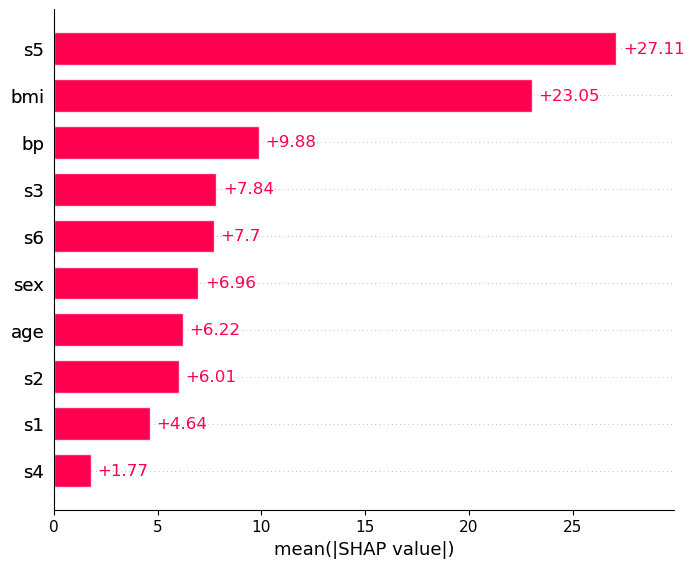

In [19]:
shap.plots.bar(shap_values)

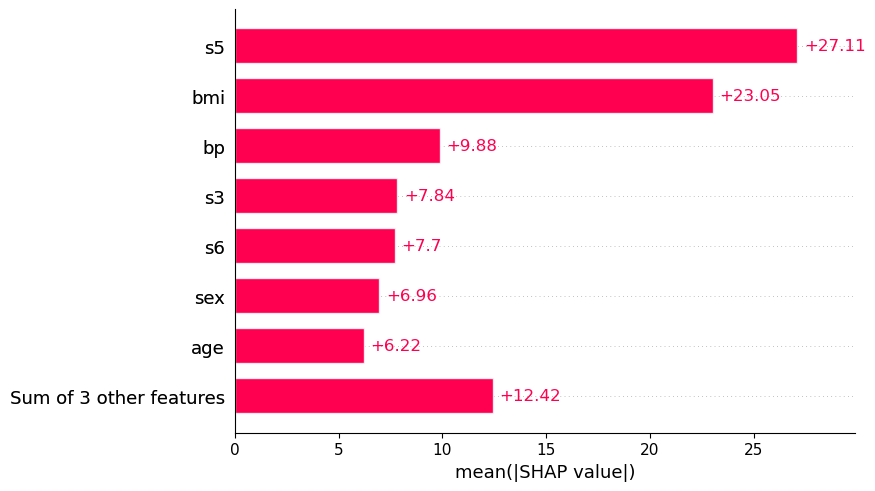

In [20]:
shap.plots.bar(shap_values, max_display=8) # Default is 10 bars

# Local bar plot


*   Bars are the SHAP values for each feature
*   Feature values are show in gray to the left of the feature names



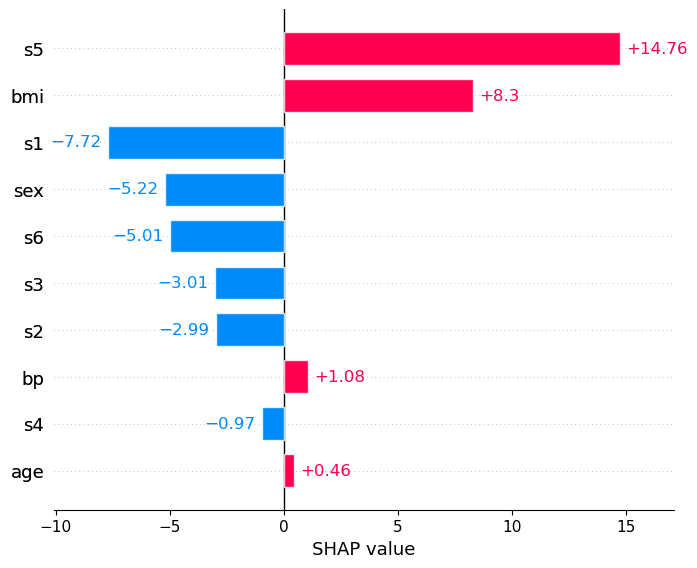

In [21]:
shap.plots.bar(shap_values[0])

# Cohort bar plot

Passing a "dictionary" of Explanation objects will create a multiple-bar plot with one bar type for each of the cohorts represented by the explanation objects.



In [22]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [23]:
df.sex.unique()

array([ 0.05068012, -0.04464164])

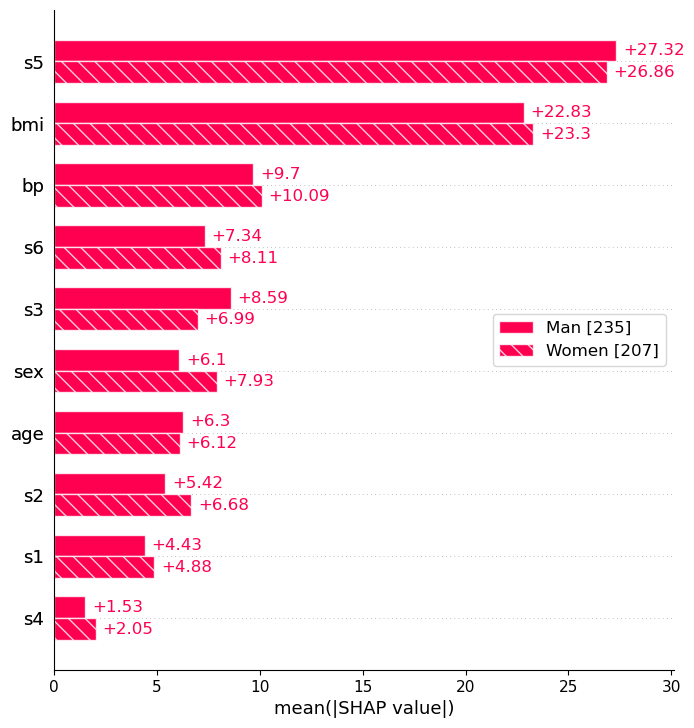

In [24]:
sex = [
    "Women" if shap_values[i, "sex"].data == 0.05068011873981862 else "Man"
    for i in range(shap_values.shape[0])
]

shap.plots.bar(shap_values.cohorts(sex).abs.mean(0))

### Auto-cohort
Create N cohort using DescisionTreeRegressor. (N=2 here)

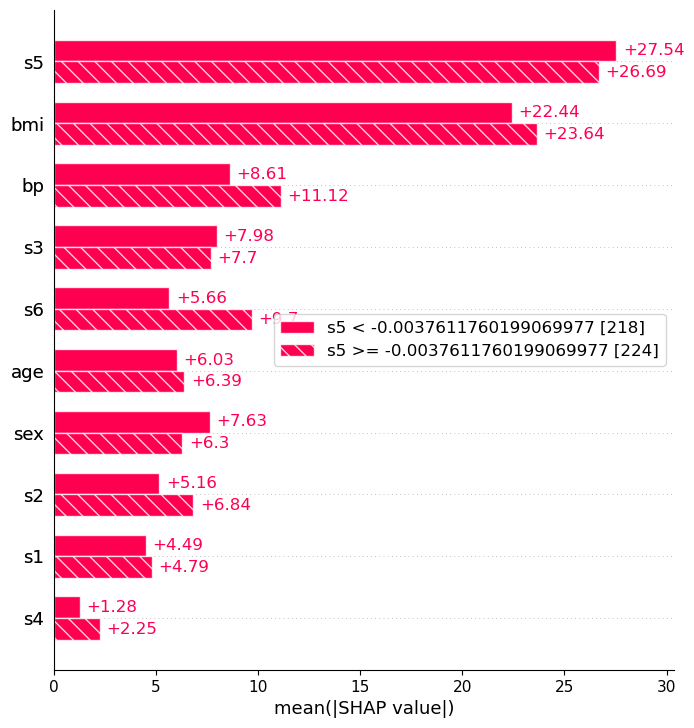

In [25]:
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

# Feature clustering


*   Default only show the distance < 0.5 (0 - 1)
*   0 distance means the features perfectly redundant and 1 means they are completely independent



In [26]:
clustering = shap.utils.hclust(df, y)

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


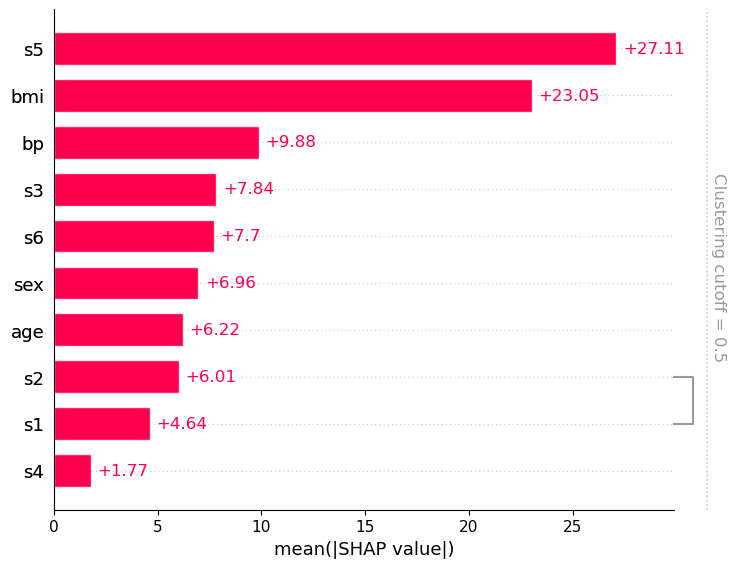

In [27]:
shap.plots.bar(shap_values, clustering=clustering)

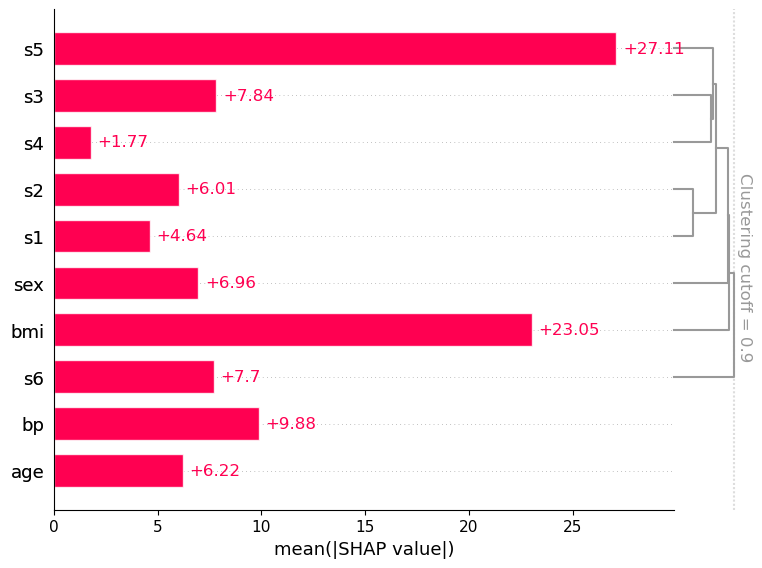

In [28]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.9)

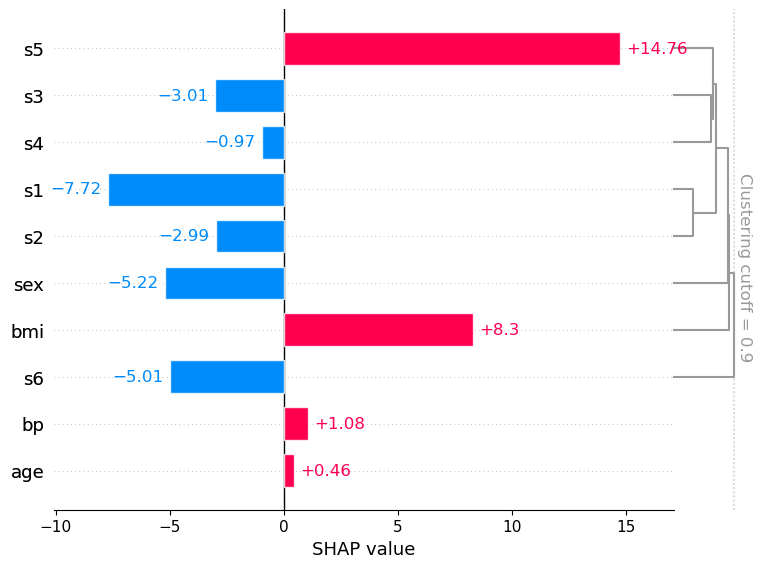

In [29]:
shap.plots.bar(shap_values[0], clustering=clustering, clustering_cutoff=0.9)

# Beeswarm plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


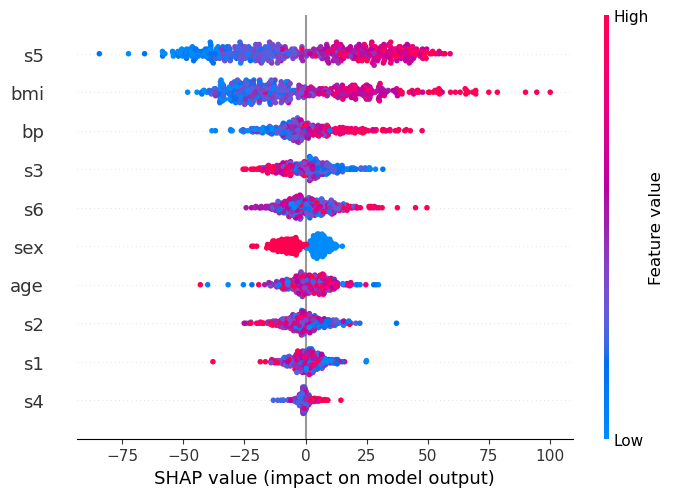

In [30]:
shap.plots.beeswarm(shap_values)

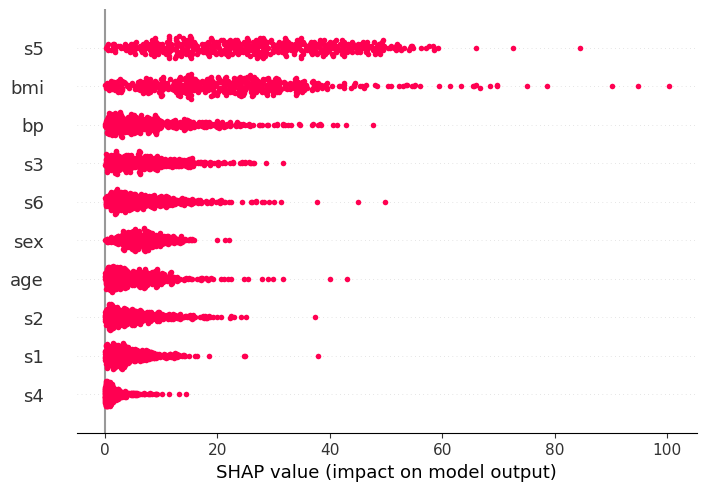

In [31]:
shap.plots.beeswarm(shap_values.abs, color="shap_red") # Can compare with bar plot

# Heatmap

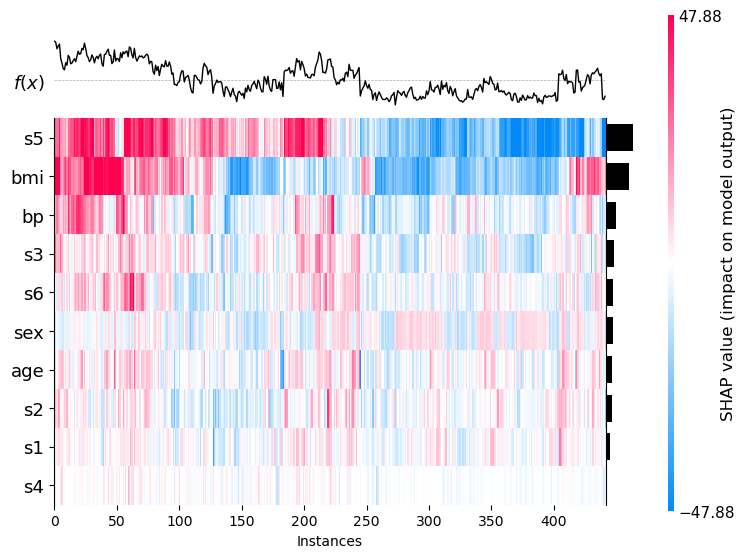

In [32]:
shap.plots.heatmap(shap_values)

# Scatter plot

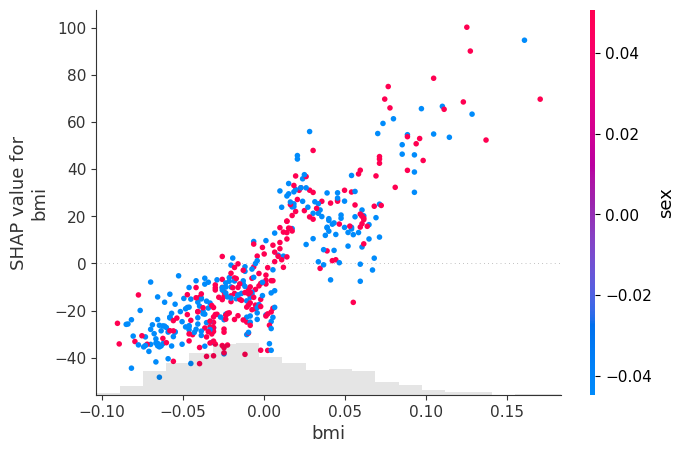

In [33]:
shap.plots.scatter(shap_values[:, "bmi"], color=shap_values[:, "sex"])

plot the most important features

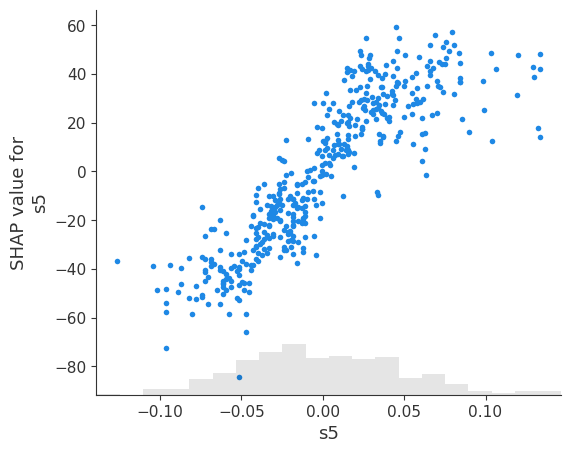

In [34]:
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-1]])

feature with the largest absolute impact for any sample

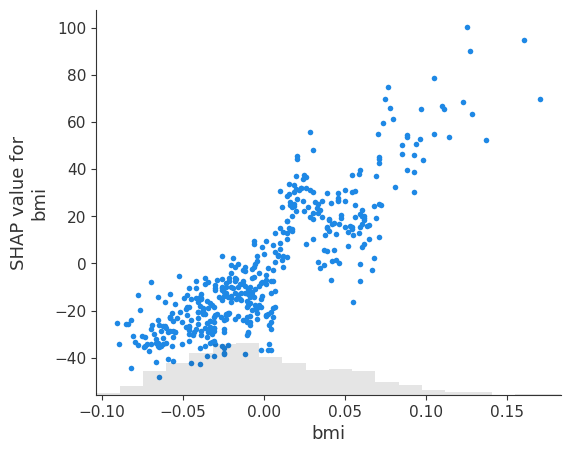

In [35]:
shap.plots.scatter(shap_values[:, shap_values.abs.max(0).argsort[-1]])

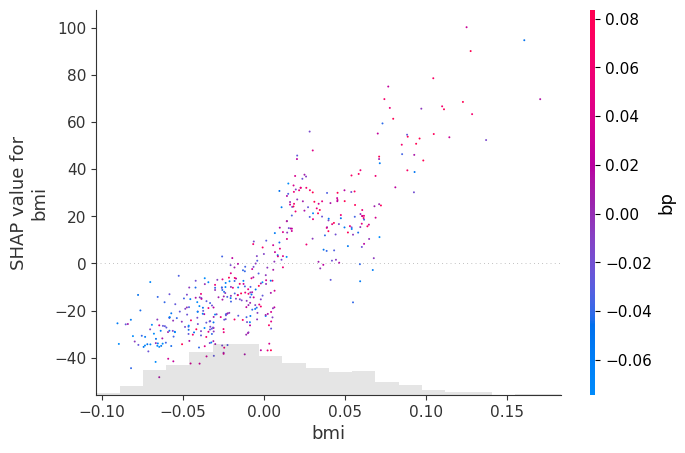

In [36]:
shap.plots.scatter(
    shap_values[:, "bmi"], dot_size=2, x_jitter=0.5, color=shap_values
)

# Violin plot

In [37]:
shap_values[0]

.values =
array([ 0.45945831, -5.22000628,  8.30047235,  1.07536802, -7.72455585,
       -2.98705238, -3.00857906, -0.9678539 , 14.75745227, -5.00800698])

.base_values =
151.55578982847535

.data =
array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


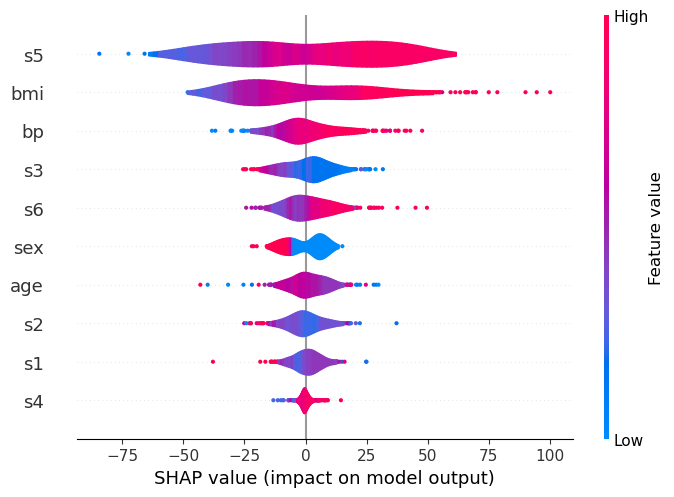

In [38]:
shap.plots.violin(shap_values)

# Waterful plot

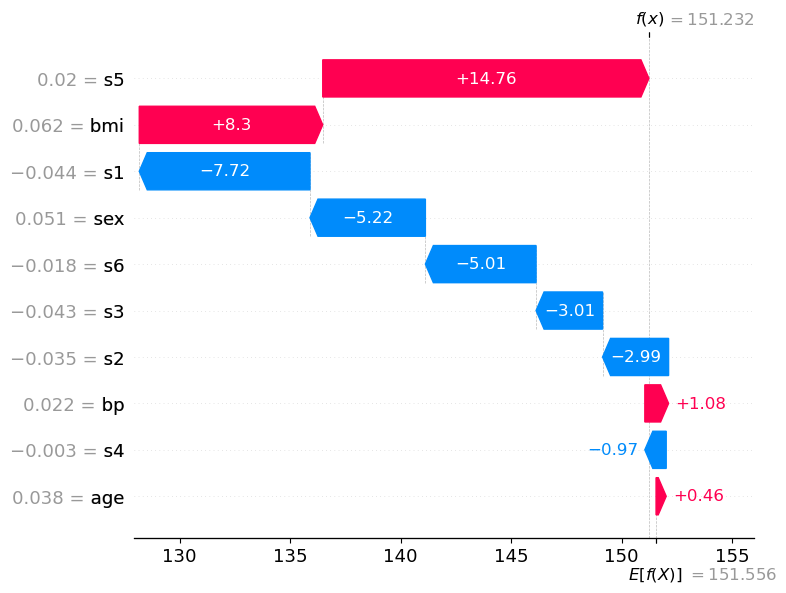

In [39]:
shap.plots.waterfall(shap_values[0])